In this Project,  I had analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors and so on. My job is to complete the ten questions.  I used Jupyter notebook to perform the analysis. House Sales in King County, USA This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

House Sales in King County, USA
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

id : A notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of the home

sqft_lot: Square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above : Square footage of house apart from basement

sqft_basement: Square footage of the basement

yr_built : Built Year

yr_renovated : Year when house was renovated

zipcode: Zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 : LotSize area in 2015(implies-- some renovations)

I require the following libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets
Load the csv:

In [15]:
file_name='kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Question 1
Display the data types of each column using the attribute dtype

In [4]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


I use the method describe to obtain a statistical summary of the dataframe.

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling
### Question 2
Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data.

In [6]:
df.drop(["id","Unnamed: 0"], axis=1,inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


I can see we have missing values for the columns  bedrooms and  bathrooms 

In [7]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


I can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). 



In [8]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)


I also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). 



In [9]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis
### Question 3
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.



In [10]:
df=df['floors'].value_counts()
df.to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# Question 4
Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.


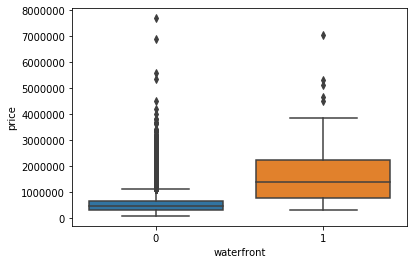

In [16]:

sns.boxplot(x="waterfront", y="price", data=df)

# Question 5
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.


(0, 8086216.727684596)

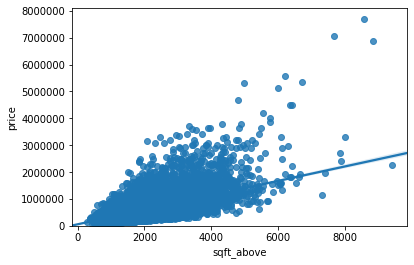

In [17]:

sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

I can use the Pandas method corr() to find the feature other than price that is most correlated with price.



In [18]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308890
sqft_basement    0.323816
view             0.397293
bathrooms        0.525885
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development
I can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.



In [19]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

# Question 6
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. 



In [20]:
lm = LinearRegression()
X = df[['sqft_living']]
Y = df['price']
lm.fit(X,Y)
lm.score(X, Y)

0.49285321790379316

# Question 7
Fit a linear regression model to predict the 'price' using the list of features:
     
Then calculate the R^2. 



In [21]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

In [22]:
for i in features:
    X=df[[i]]
    x=np.nan_to_num(X)
    Y = df['price']
    lm = LinearRegression()
    lm.fit(x,Y)
    print(lm.score(x, Y))

0.06594310068341092
0.07095267538578331
0.09425113672917484
0.09507947467657651
0.104856815269744
0.15784211584121532
0.27576939959239877
0.3426684607560172
0.3667117528382794
0.44546848610928713
0.49285321790379316


# This will help with Question 8
Create a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [23]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# Question 8
Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [29]:

x=np.nan_to_num(df[features])
y=df.price
pipe=Pipeline(Input)
pipe.fit(x,y)
pipe.score(x,y)

0.7513471131841643

# Module 5: Model Evaluation and Refinement
Import the necessary modules:

cross_val_score


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


I split the data into training and testing sets:

In [25]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']
def clean_dataset(df):
        assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
        df.dropna(inplace=True)
        indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
        return df[indices_to_keep].astype(np.float64)
X=clean_dataset(df[[i]])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Question 9
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.



In [26]:
from sklearn.linear_model import Ridge
x_train=np.nan_to_num(x_train)
y_train=np.nan_to_num(y_train)
x_test=np.nan_to_num(x_test)
y_test=np.nan_to_num(y_test)
x_train=np.nan_to_num(x_train)
y_train=np.nan_to_num(y_train)
x_test=np.nan_to_num(x_test)
y_test=np.nan_to_num(y_test)
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test,y_test)

0.4910058627910385

# Question 10
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test=y_test.reshape(-1,1)
x_train_pr = pr.fit_transform(x_train)
y_train_pr = pr.fit_transform(y_train)
x_test_pr = pr.fit_transform(x_test)
y_test_pr = pr.fit_transform(y_test)
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train_pr)
RigeModel.score(x_test_pr,y_test_pr)

C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99767e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.20316078653036257